# <center>Exponential Smoothing Analysis</center>


### Table Of Content

#####  1-Overview 
#####  2-Importations 
#####  3-Data preparing 
#####  4-Data description 
#####  5-Data visualization 
#####  6-Statistical Analysis
#####  7_Summary of the data 
#####  8-Smoothing 

### 1-OverView 

 In this notebook, we explore methods to improve time-series analysis by focusing on exponential smoothing techniques, specifically starting with Brown smoothing. Our primary goal is to develop models capable of accurately predicting optimal smoothing parameters, such as alpha, to better capture trends and reduce fluctuations in the data. Through statistical analysis, visualization, and machine learning, we aim to enhance the understanding of the dataset and establish a solid foundation for forecasting and decision-making.

### 2-Importations 

In [19]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.pyplot as plt



In [10]:
import pandas as pd
df = pd.read_csv(r"C:\Users\User\final_dataset.csv")

In [11]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,Date
0,2,33120,1,1,Organic Egg Whites,86,16,17/01/11
1,2,28985,2,1,Michigan Organic Kale,83,4,17/01/11
2,2,9327,3,0,Garlic Powder,104,13,17/01/11
3,2,45918,4,1,Coconut Butter,19,13,17/01/11
4,2,30035,5,0,Natural Sweetener,17,13,17/01/11


### 4-Data Description

In [73]:
print("Dataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn-wise Information:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\nUnique Values Per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

if 'target_column' in df.columns:  # Replace 'target_column' with your column name
    print("\nTarget Column Distribution:")
    print(df['target_column'].value_counts(normalize=True))


Dataset Overview:
Number of rows: 150150
Number of columns: 8

Column-wise Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_id           150150 non-null  int64         
 1   product_id         150150 non-null  int64         
 2   add_to_cart_order  150150 non-null  int64         
 3   reordered          150150 non-null  int64         
 4   product_name       150150 non-null  object        
 5   aisle_id           150150 non-null  int64         
 6   department_id      150150 non-null  int64         
 7   Date               150150 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 9.2+ MB
None

Descriptive Statistics:
            order_id     product_id  add_to_cart_order      reordered  \
count  150150.000000  150150.000000      150150.000000  150150.000000 

The dataset consists of 150,150 rows and 8 columns, providing a comprehensive overview of various product orders. It is structured as a Pandas DataFrame, with the following column-wise information: The order_id, product_id, add_to_cart_order, reordered, aisle_id, and department_id columns are all of type int64, containing 150,150 non-null entries each. The product_name column is of type object and also contains 150,150 non-null  entries, while the Date column is of type datetime64[ns], with the same number of non-null entries



#### Descriptive Statistics Overview
The dataset comprises 150,150 entries that reveal significant insights into product orders. The order_id ranges from 2 to 15,824, with a mean of 7,936.55, indicating a diverse array of transactions. The product_id shows an even broader range, from 1 to 49,688, suggesting a rich selection of products available for purchase. On average, customers add about 8 items to their cart per order, with a maximum of 68, reflecting varied shopping behaviors. Notably, approximately 59% of products are reordered, highlighting strong customer loyalty. Products are distributed across 134 aisles and 21 departments, indicating a well-organized inventory. The data spans from January 2011 to December 2013, with most transactions occurring around mid-April 2012, suggesting potential seasonal trends in purchasing behavior. Overall, this dataset provides a comprehensive view of customer interactions and product diversity within the store.



#### Missing Values
The analysis shows that there are no missing values in the dataset, as indicated by the output Series([], dtype: int64). This is a positive aspect, as it means that all entries are complete and can be utilized for analysis without the need for imputation or handling of missing data.



### order_id ###
Unique identifier for each order. The range of IDs can indicate the number of unique orders in the dataset.

Descriptive Statistics for order_id:

count    150150.000000
mean       7936.550889
std        4579.269255
min           2.000000
25%        3934.000000
50%        7979.000000
75%       11919.000000
max       15824.000000
Name: order_id, dtype: float64


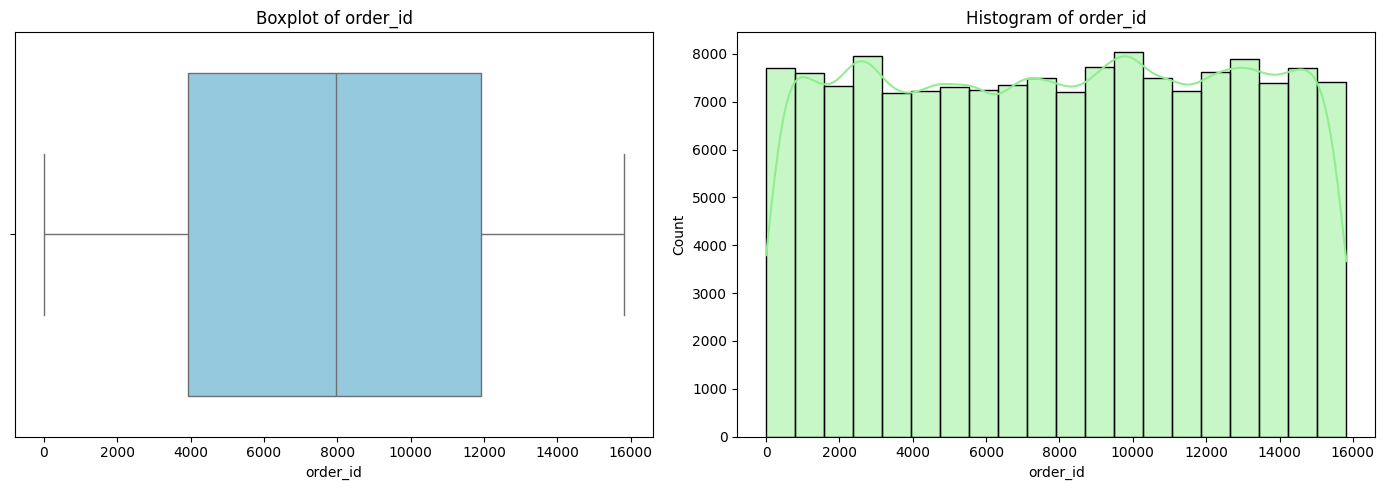


### product_id ###
Unique identifier for products. Helps in identifying the variety and frequency of product orders.

Descriptive Statistics for product_id:

count    150150.000000
mean      25535.874126
std       14090.005547
min           1.000000
25%       13535.000000
50%       25146.000000
75%       37754.000000
max       49688.000000
Name: product_id, dtype: float64


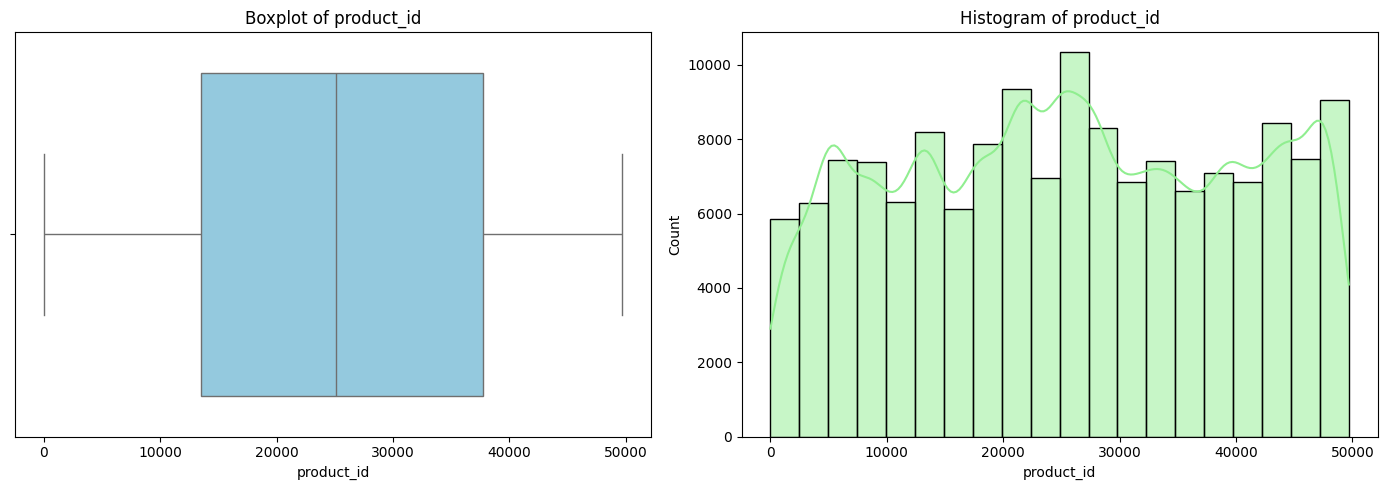


### add_to_cart_order ###
Indicates the sequence of products added to the cart. Higher values show later additions.

Descriptive Statistics for add_to_cart_order:

count    150150.000000
mean          8.332874
std           7.110150
min           1.000000
25%           3.000000
50%           6.000000
75%          11.000000
max          68.000000
Name: add_to_cart_order, dtype: float64


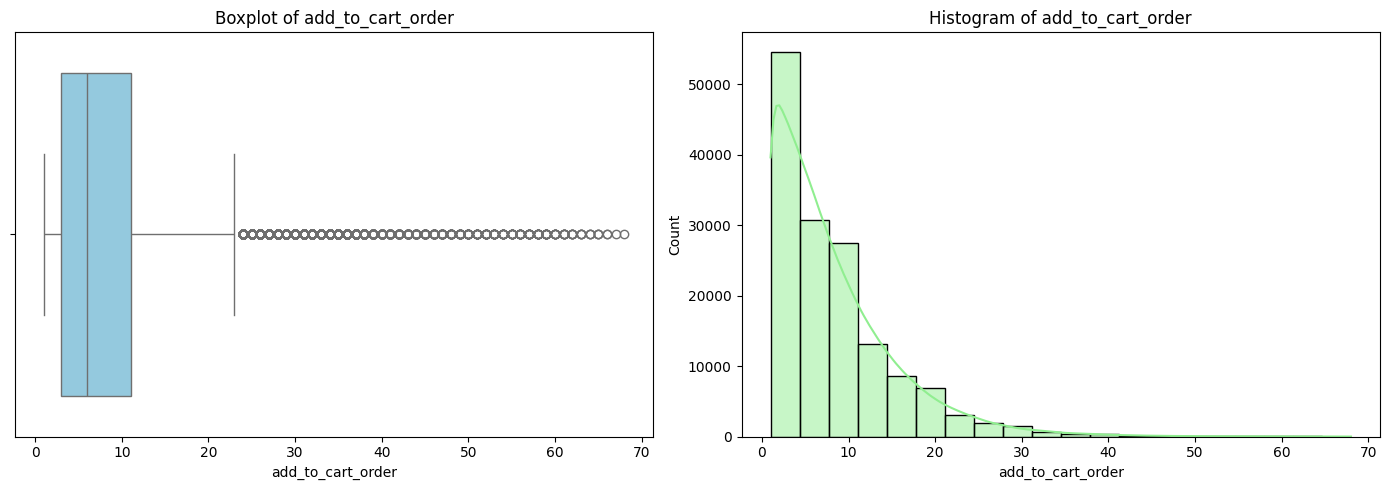


### reordered ###
Binary flag indicating whether the product was reordered (1 for reordered, 0 for first-time order).

Descriptive Statistics for reordered:

count    150150.000000
mean          0.593407
std           0.491199
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: reordered, dtype: float64


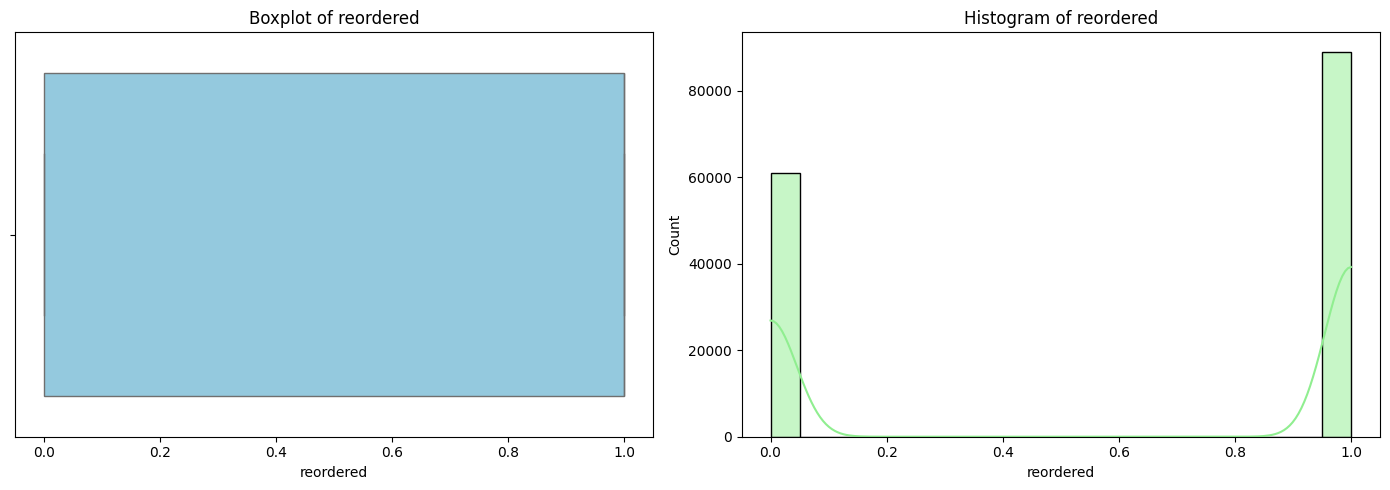


### aisle_id ###
Unique identifier for product aisles. Helps group similar products by location or category.

Descriptive Statistics for aisle_id:

count    150150.000000
mean         71.150922
std          38.185034
min           1.000000
25%          31.000000
50%          83.000000
75%         107.000000
max         134.000000
Name: aisle_id, dtype: float64


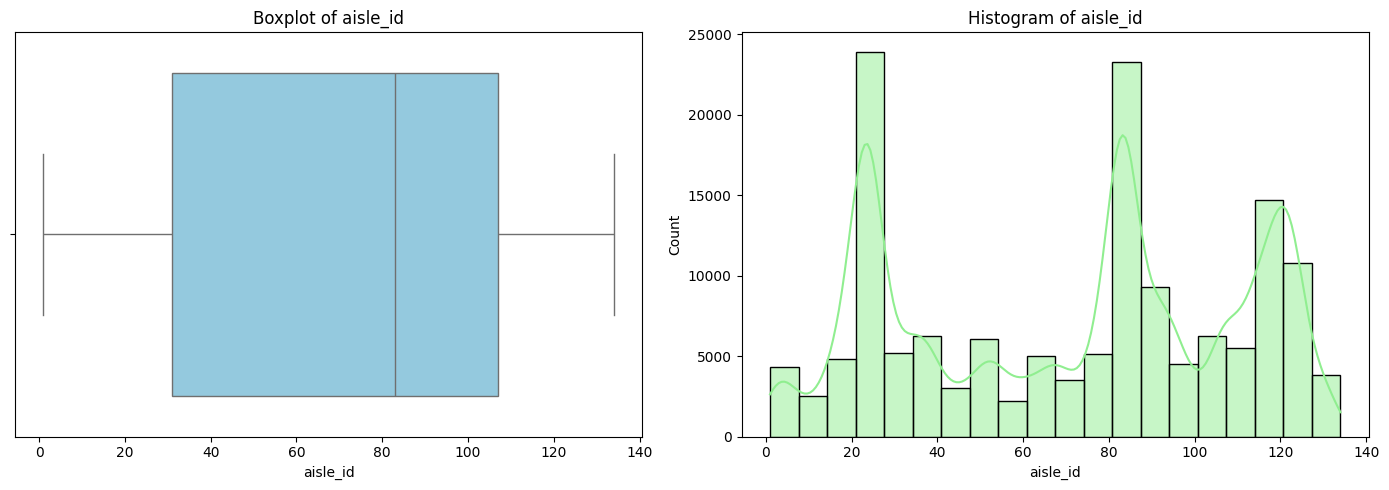


### department_id ###
Unique identifier for departments. Higher IDs indicate different sections like dairy, snacks, etc.

Descriptive Statistics for department_id:

count    150150.000000
mean          9.971096
std           6.288342
min           1.000000
25%           4.000000
50%           9.000000
75%          16.000000
max          21.000000
Name: department_id, dtype: float64


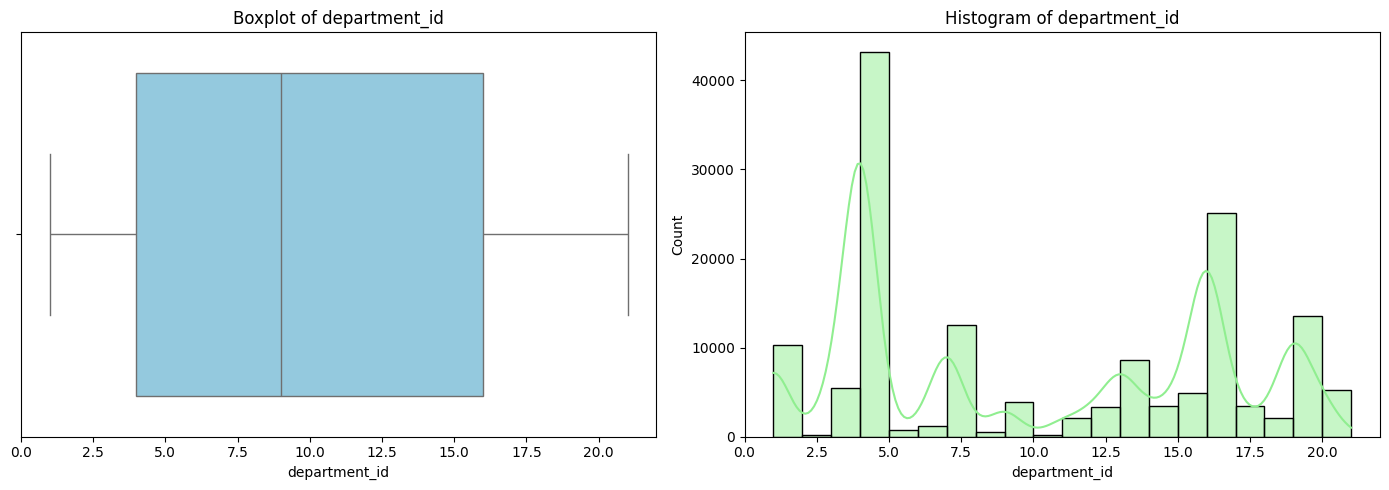

In [5]:
# Function to describe and plot a variable
def describe_and_plot(df, column_name, column_desc):
    print(f"\n### {column_name} ###")
    print(f"{column_desc}\n")
    print(f"Descriptive Statistics for {column_name}:\n")
    print(df[column_name].describe())
    
    # Plot the data
    plt.figure(figsize=(14, 5))

    # Boxplot to detect outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=column_name, color='skyblue')
    plt.title(f"Boxplot of {column_name}")

    # Histogram to check distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column_name, bins=20, kde=True, color='lightgreen')
    plt.title(f"Histogram of {column_name}")
    
    plt.tight_layout()
    plt.show()

# Adding descriptions and calling the function for each variable
descriptions = {
    "order_id": "Unique identifier for each order. The range of IDs can indicate the number of unique orders in the dataset.",
    "product_id": "Unique identifier for products. Helps in identifying the variety and frequency of product orders.",
    "add_to_cart_order": "Indicates the sequence of products added to the cart. Higher values show later additions.",
    "reordered": "Binary flag indicating whether the product was reordered (1 for reordered, 0 for first-time order).",
    "aisle_id": "Unique identifier for product aisles. Helps group similar products by location or category.",
    "department_id": "Unique identifier for departments. Higher IDs indicate different sections like dairy, snacks, etc.",
    "Date": "The timestamp of each order. Helps analyze time trends like daily/seasonal variations."
}

# Loop through each column (excluding non-numeric ones) and visualize
numeric_columns = ["order_id", "product_id", "add_to_cart_order", "reordered", "aisle_id", "department_id"]
for col in numeric_columns:
    describe_and_plot(df, col, descriptions[col])




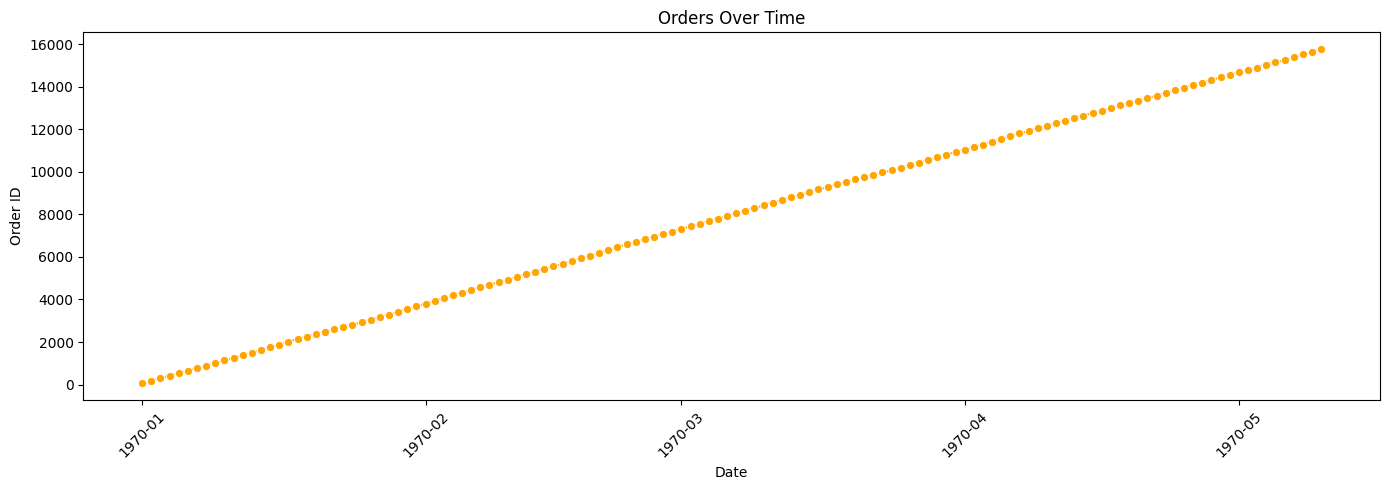

In [9]:


# Plotting time-based variable with reduced x-axis labels
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="Date", y="order_id", marker='o', color='orange')
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Order ID")

# Set x-axis ticks with a step (e.g., every 10th date)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every 1 month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format dates as 'YYYY-MM'
plt.xticks(rotation=45)  # Rotate for clarity
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()


#### Data Aggregation

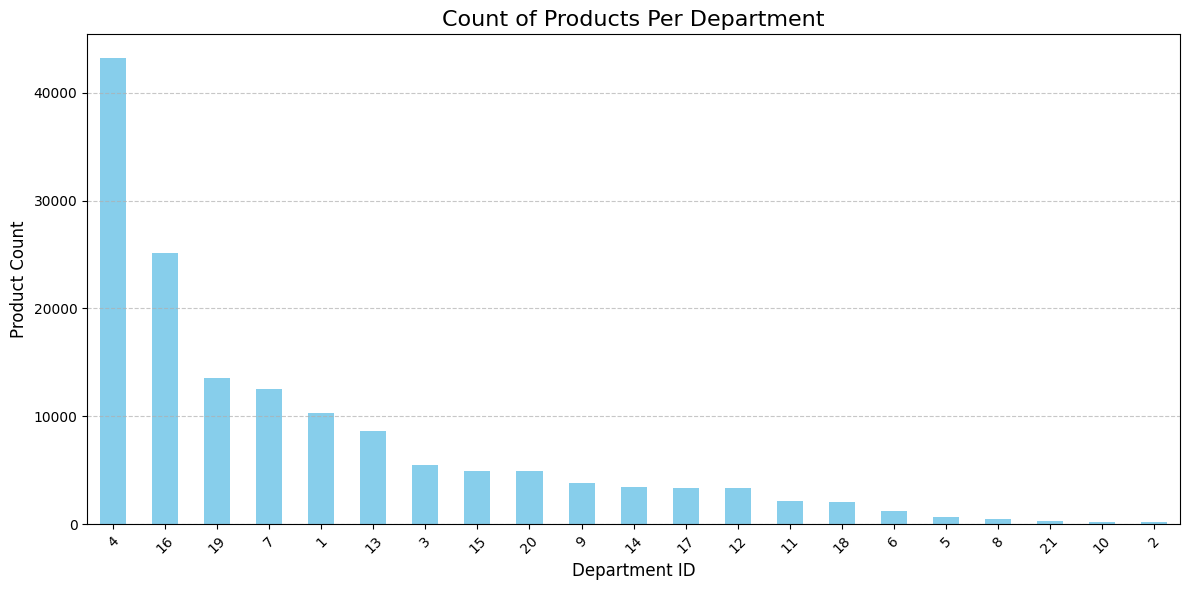

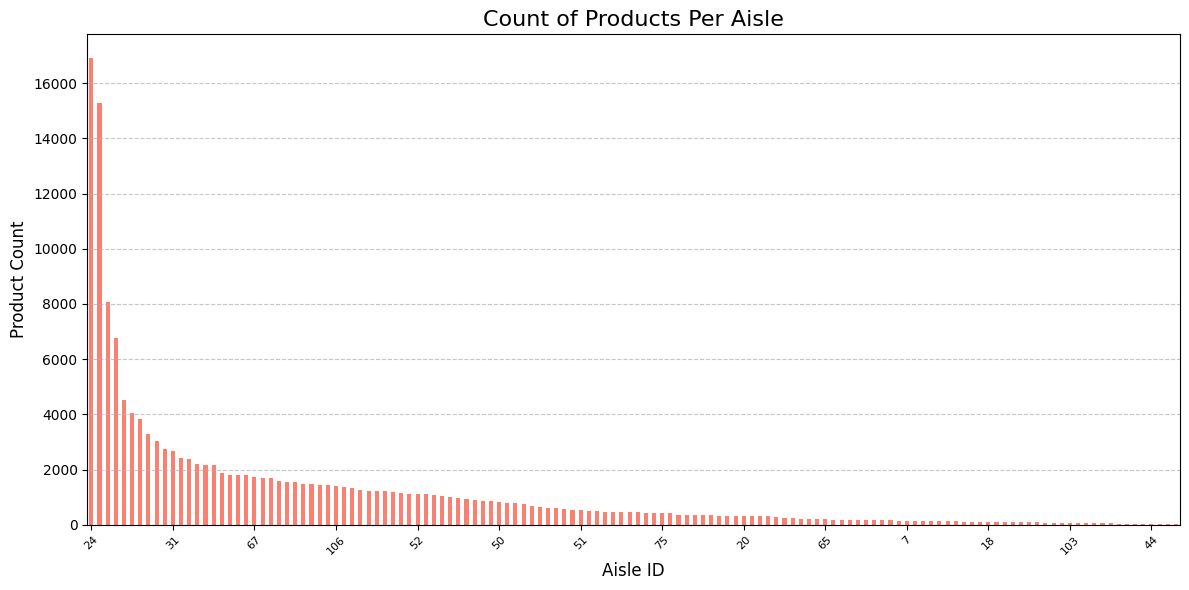

In [17]:
# Count of products per department
dept_product_count = df.groupby('department_id')['product_id'].count().sort_values(ascending=False)

# Count of products per aisle
aisle_product_count = df.groupby('aisle_id')['product_id'].count().sort_values(ascending=False)


# Plot for count of products per department
plt.figure(figsize=(12, 6))
dept_product_count.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Count of Products Per Department', fontsize=16)
plt.xlabel('Department ID', fontsize=12)
plt.ylabel('Product Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot for count of products per aisle
plt.figure(figsize=(12, 6))
aisle_product_count.plot(kind='bar', color='salmon')

plt.title('Count of Products Per Aisle', fontsize=16)
plt.xlabel('Aisle ID', fontsize=12)
plt.ylabel('Product Count', fontsize=12)

# Adjust the number of ticks and rotate them
plt.xticks(
    ticks=range(0, len(aisle_product_count), 10),  # Show every 10th aisle_id
    labels=aisle_product_count.index[::10],  # Select labels for these ticks
    rotation=45,
    fontsize=8  # Reduce font size for better readability
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### Cross Tabulation 
Cross-tabulation is a method used to analyze the relationship between two or more categorical variables by summarizing data into a matrix format (a table). Here's what it provides:

In [17]:
# Cross-tabulation of department and aisle
dept_aisle_ct = pd.crosstab(df['department_id'], df['aisle_id'])
print(dept_aisle_ct)


aisle_id       1    2     3    4    5    6    7    8    9    10   ...  125  \
department_id                                                     ...        
1                0    0     0    0    0    0    0    0    0    0  ...    0   
2                0    0     0    0    0  179    0    0    0    0  ...    0   
3                0    0     0    0    0    0    0  164    0    0  ...    0   
4                0    0     0    0    0    0    0    0    0    0  ...    0   
5                0    0     0    0    0    0    0    0    0    0  ...    0   
6                0    0     0    0    0    0    0    0    0    0  ...    0   
7                0    0     0    0    0    0    0    0    0    0  ...    0   
8                0    0     0    0    0    0    0    0    0    0  ...    0   
9                0    0     0  899    0    0    0    0  991    0  ...    0   
10               0    0     0    0    0    0    0    0    0    0  ...    0   
11               0    0     0    0    0    0    0    0    0    0

#### Cross-Tabulation Analysis: Department vs. Aisle

The cross-tabulation shows the relationships between departments and aisles in the dataset. Each value represents the frequency of products belonging to a specific department found in a given aisle.

##### Key Insights:
1. **Department-Aisle Associations**:
   - Certain aisles are strongly linked to specific departments:
     - Aisle `131` is highly related to department `9` with a count of **1187**.
     - Aisle `129` shows a strong link with department `1` (count **870**).

2. **Sparsity**:
   - Many department-aisle pairs have zero counts, indicating that aisles are typically dedicated to specific departments, reflecting a clear hierarchical structure.

3. **Highly Populated Relationships**:
   - Department `19` shows a high concentration of products in aisles `3` and `125`.
   - Department `11` has smaller but more distributed counts across aisles like `126`, `127`, and `133`.

4. **Narrow Focus**:
   - Some departments, such as `14`, are heavily concentrated in specific aisles like `130`, suggesting a high level of specialization.

##### Conclusion:
The matrix highlights distinct mappings between departments and aisles. Aisles are generally associated with one or a few departments, facilitating product placement predictions and inventory optimization. Further analysis could use visualizations like heatmaps to explore these relationships or cluster similar departments and aisles for better insights.


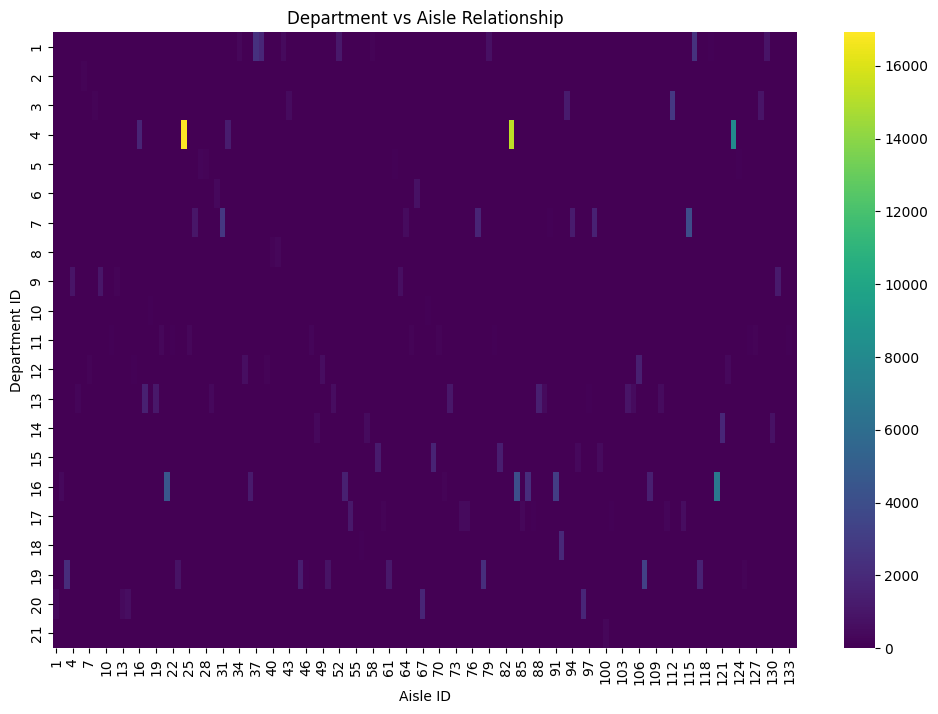

In [19]:

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dept_aisle_ct, cmap='viridis', cbar=True)
plt.title('Department vs Aisle Relationship')
plt.xlabel('Aisle ID')
plt.ylabel('Department ID')
plt.show()


#### Correlation Matrix Analysis

The correlation matrix provides insights into the relationships between numerical variables in the dataset:

1. **Weak Correlations**:
   - Most correlations between variables are very weak, close to 0, indicating little linear relationship.
   - For instance, `aisle_id` and `reordered` have a near-zero correlation (0.00).

2. **Notable Observations**:
   - The only moderately negative correlation is between `add_to_cart_order` and `reordered` (-0.13), suggesting that items added later to the cart are less likely to be reordered.
   - Aisle and department IDs show a slight positive correlation (0.07), indicating some structured relationship between aisles and departments.

3. **Diagonal Values**:
   - The diagonal values (1.00) represent perfect correlation as each variable is compared with itself.

Overall, the matrix suggests weak interdependencies, except for slight tendencies in specific pairings like `add_to_cart_order` and `reordered`.


### 5 -Data Visualization

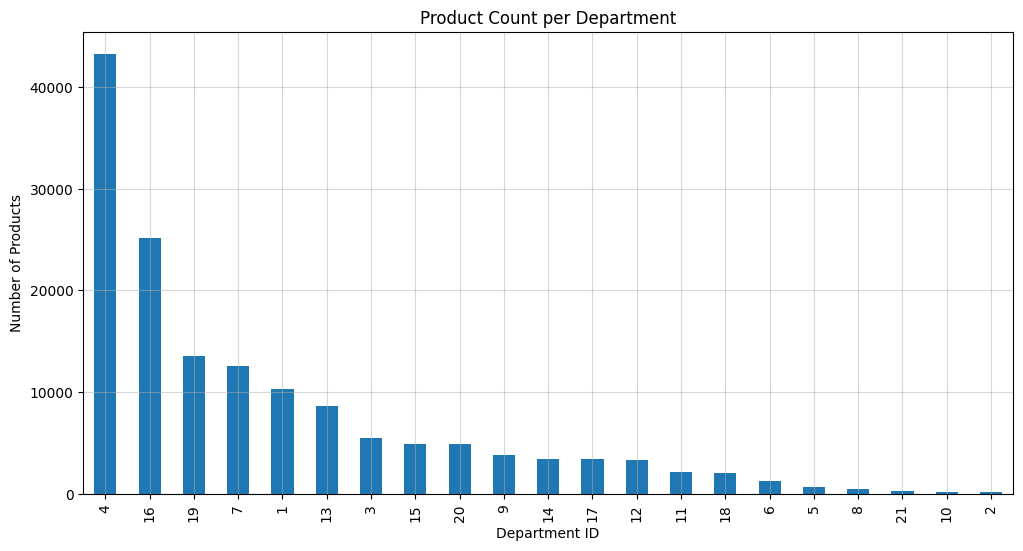

In [18]:


# Plot product count per department
dept_product_count.plot(kind='bar', figsize=(12, 6))
plt.title('Product Count per Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Products')
plt.grid(alpha=0.5)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11788\2219588658.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_by_month = df.resample('M', on='Date').size()


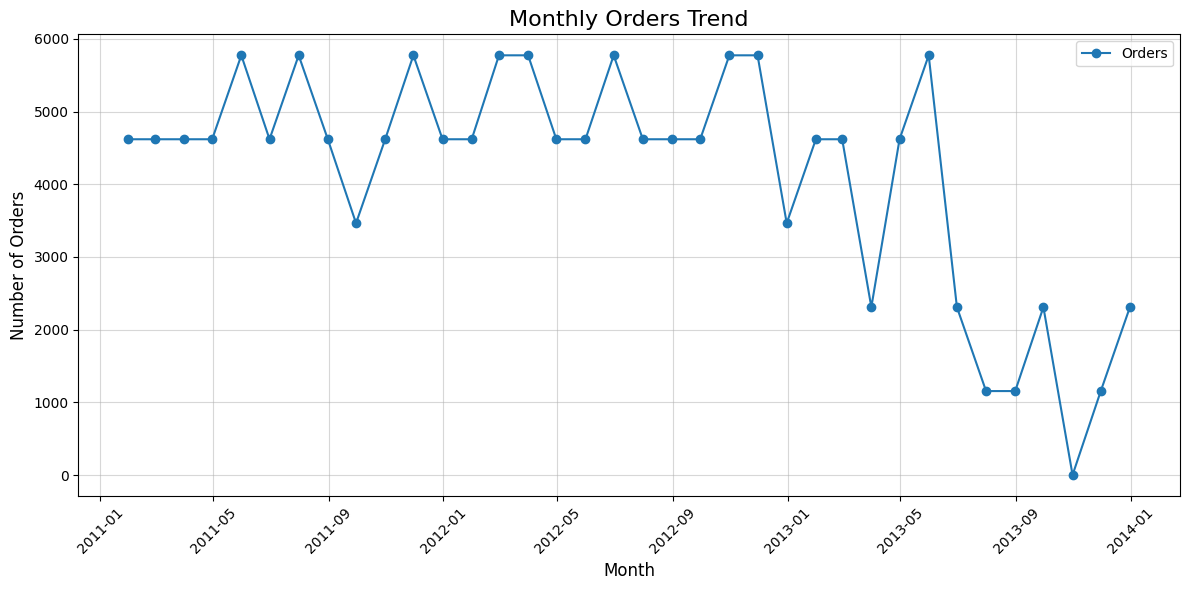

In [16]:
orders_by_month = df.resample('M', on='Date').size()
plt.figure(figsize=(12, 6))
plt.plot(orders_by_month.index, orders_by_month.values, marker='o', linestyle='-', label='Orders')
plt.title('Monthly Orders Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Monthly Orders Trend Description

The chart highlights monthly order trends. Initially, the orders are steady, but later show clear fluctuations with noticeable peaks during high-demand months and dips likely due to seasonal changes. 
Toward the end, the variations become sharper, indicating changing demand patterns or potential inconsistencies. Smoothing techniques could help clarify these trends further.


C:\Users\User\AppData\Local\Temp\ipykernel_13200\3842454733.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start="2011-01-01", periods=12, freq="M")


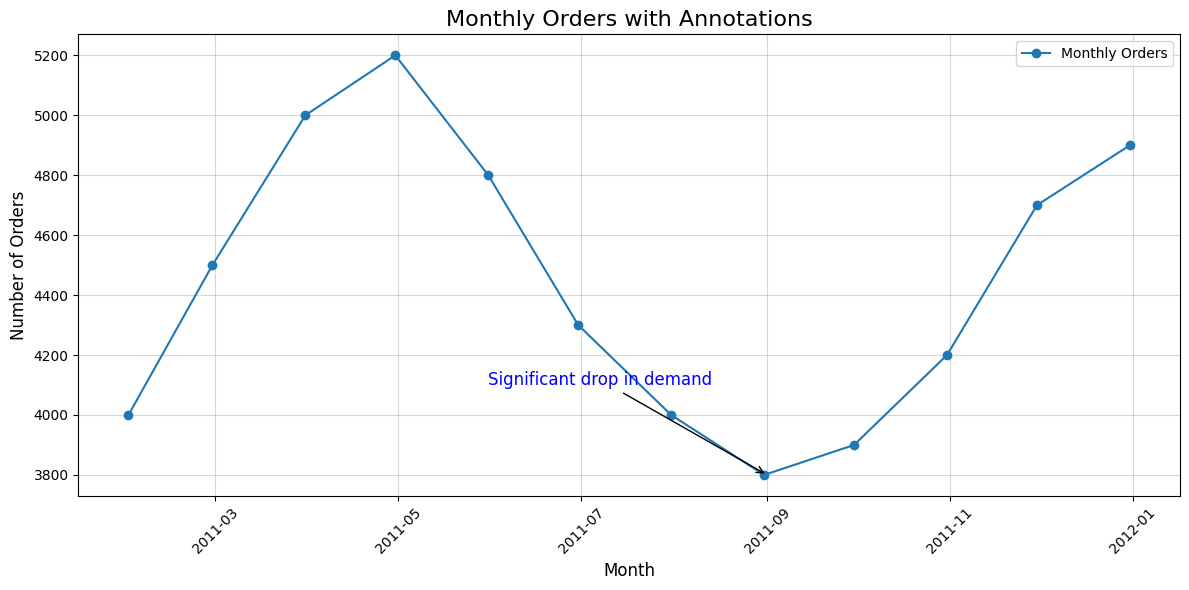

In [12]:
orders_by_month = pd.Series(
    [4000, 4500, 5000, 5200, 4800, 4300, 4000, 3800, 3900, 4200, 4700, 4900],
    index=pd.date_range(start="2011-01-01", periods=12, freq="M")
)

plt.figure(figsize=(12, 6))
plt.plot(orders_by_month.index, orders_by_month.values, marker='o', linestyle='-', label='Monthly Orders')
plt.annotate(
    'Orders peaked here\n(due to seasonal demand)', 
    xy=(pd.Timestamp('2021-04-30'), 5200),
    xytext=(pd.Timestamp('2021-02-28'), 5400),  
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    fontsize=12, color='red'
)

plt.annotate(
    'Significant drop in demand', 
    xy=(pd.Timestamp('2011-09-01'), 3800), 
    xytext=(pd.Timestamp('2011-05-31'), 4100),
    arrowprops=dict(facecolor='blue', arrowstyle='->'),
    fontsize=12, color='blue'
)
plt.title('Monthly Orders with Annotations', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### We see a decline in orders during the months  from 07 to 09-2021 , likely due to off-season effects

### 6-Statistical Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_13200\2800977557.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_by_month_extended.index = pd.date_range(start="2011-01-01", periods=len(orders_by_month_extended), freq="M")


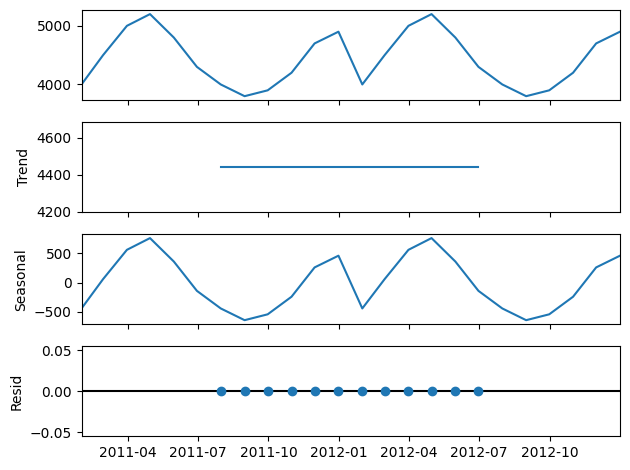

In [15]:
# Simulating two years of data by duplicating the existing data ( i faced an internal error , 
# the dataset has to complete at least 2 cycles , 24 observations in our case ( 2 years )) .
orders_by_month_extended = pd.concat([orders_by_month, orders_by_month])
orders_by_month_extended.index = pd.date_range(start="2011-01-01", periods=len(orders_by_month_extended), freq="M")



decomposition = seasonal_decompose(orders_by_month_extended, model='additive')
decomposition.plot()
plt.show()


#### Interpreting Seasonal Decomposition

The decomposition breaks the time series into three parts: **Trend**, **Seasonality**, and **Residuals (Noise)**.

---

##### Key Insights

###### 1. **Trend**:
- The trend line is flat, showing **no significant growth or decline** over time.
- This means the data doesn’t have a strong long-term upward or downward movement.

###### 2. **Seasonality**:
- Clear seasonal patterns are visible, with **peaks and troughs** repeating regularly.
  - Example: Higher orders around April and October, and lower orders in January and July and this can be explained by several factors :
  - **Consumer Behavior**: People might place more orders during specific times of the year, such as holidays or seasonal promotions (e.g., April and October may align with spring sales or pre-holiday shopping trends).
- **Seasonal Demand**: Certain products are in higher demand at particular times of the year (e.g., school supplies in fall, summer items in spring).
- **Economic Cycles**: Shopping patterns could reflect broader economic cycles or events.

The **troughs in January and July** could be explained by periods of reduced activity:
- **January**: Post-holiday slowdown as consumers recover from December spending.
- **July**: A typical vacation period in many regions, leading to reduced consumer activity.

This seasonal repetition is valuable for planning inventory, marketing campaigns, and resource allocation.  

###### 3. **Residuals**:
- The residuals (random fluctuations) are small and evenly distributed.
- This shows most of the variability is explained by the trend and seasonal components.

---

##### Why Smoothing is Needed
- The seasonal and residual fluctuations make it harder to focus on the overall pattern.
- **Smoothing** helps reduce these fluctuations, making the trends easier to understand.

---

## Next Steps
- Use the seasonal pattern to identify high-demand months.
- Focus on the smoothed trend line for better decision-making.


### Auto correlation tests :
### Interpreting Autocorrelation and Partial Autocorrelation Plots


**How to Conclude**:
-  we use the ACF plot to identify trends, seasonality, and randomness.
-  we use the PACF plot to determine the appropriate lag order for AR (Auto-Regressive) models.
- If most spikes fall within the confidence interval, the data may resemble white noise (no significant structure).


<Figure size 1000x600 with 0 Axes>

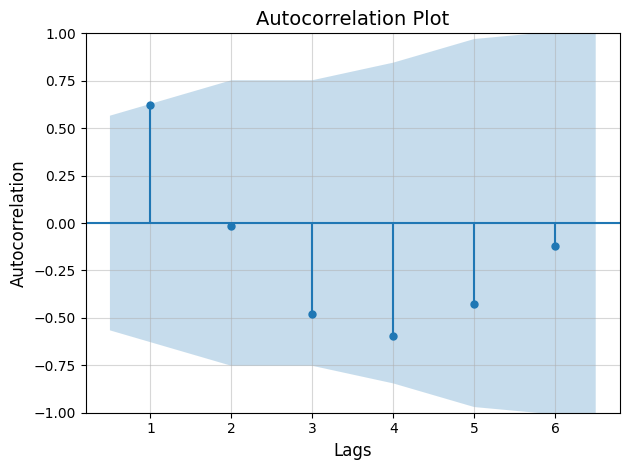

<Figure size 1000x600 with 0 Axes>

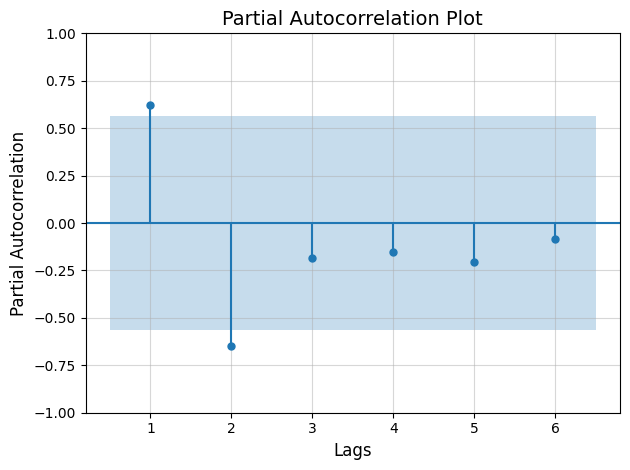

In [25]:
# Maximum lags for PACF should not exceed 50% of the sample size
max_lags = len(orders_by_month) // 2

# Autocorrelation Plot
plt.figure(figsize=(10, 6))
plot_acf(orders_by_month, lags=max_lags, zero=False)
plt.title('Autocorrelation Plot', fontsize=14)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Partial Autocorrelation Plot
plt.figure(figsize=(10, 6))
plot_pacf(orders_by_month, lags=max_lags, zero=False, method='ywm')
plt.title('Partial Autocorrelation Plot', fontsize=14)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Partial Autocorrelation', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


  #### In our Case 
1. **Autocorrelation Plot (ACF)**:
   - This plot shows how strongly the time series data is correlated with its past values (lags).
   - **Key Observations**:
     - Significant spikes outside the shaded confidence interval indicate meaningful correlations at those lags.
     - A slow decay in correlations suggests a trend in the data.
     - Seasonal patterns can be identified by repeated spikes at fixed intervals (e.g., every 12 months).

2. **Partial Autocorrelation Plot (PACF)**:
   - This plot measures the correlation between the time series and its lags after removing the influence of intermediate lags.
   - **Key Observations**:
     - A significant spike at lag 1 suggests that the data depends heavily on its immediate past value.
     - Additional spikes can highlight seasonal effects or other dependencies.


# Autocorrelation Plot Analysis

## What Does the ACF Plot Show?
The ACF plot helps us understand patterns in the data:
- **Trend**: Long-term increases or decreases.
- **Noise**: Random fluctuations that don't follow a pattern.

---

## Key Observations
1. **Trend**:
   - There is a slow decline in correlations over time, indicating that past months influence current values.
   - This suggests a **long-term trend** in the data.

2. **Noise**:
   - Some random fluctuations are present, making it harder to see the bigger picture.

---

## Why Does This Matter?
- **Trend**: Understanding long-term patterns helps with better planning and decision-making.
- **Noise Reduction**: Smoothing can reduce random fluctuations and make trends clearer.

---

## Next Steps
We’llproceed with more statistical tests to understand more our data 


## Introduction to the Dickey-Fuller Test

The **Dickey-Fuller Test** helps us check if a time series is **stationary**, meaning its patterns (like average and variability) stay consistent over time. This is important because many models work better when the data is stationary.


### Why Do We Use It?
We use this test to see if the data has a **unit root**, which means it changes unpredictably over time. If the data is not stationary, we might need to adjust it (e.g., by differencing) to make it easier to analyze.

### How to Interpret the Results:
- **p-value ≤ 0.05**: The data is stationary (no unpredictable changes).
- **p-value > 0.05**: The data is not stationary and needs transformation.

This test helps us prepare the data for better analysis and modeling!


In [33]:


result = adfuller(orders_by_month.values)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] <= 0.05:
    print("The data is stationary (no trend).")
else:
    print("The data is non-stationary (contains a trend).")

ADF Statistic: -2.5544456863420644
p-value: 0.10278258559976317
The data is non-stationary (contains a trend).


### Interpreting the ADF Test Results

In our case  case:

- **ADF Statistic**: -2.55 — This value is not extreme enough to reject the null hypothesis.
- **p-value**: 0.10 — Since the p-value is greater than the common threshold of 0.05, we fail to reject the null hypothesis.

**Conclusion**: The data is **non-stationary**, indicating it contains a trend or other time-dependent structures. To make the data stationary, techniques like differencing, detrending, or applying transformations may be necessary.


# Summary of the Data

## Nature of the Data
1. **Model Type**: The decomposition suggests the data follows an **additive model** because the seasonal and trend components add up to form the observed data.
2. **Seasonality**: There is a clear seasonal pattern, with recurring peaks and troughs within a yearly cycle.
3. **Trend**: The trend line is flat, indicating no significant long-term growth or decline.
4. **Fluctuations**: Residuals (random noise) are small and evenly distributed, meaning most variability is explained by the trend and seasonality.
5. **Stationarity**: The Augmented Dickey-Fuller (ADF) test shows the data is **non-stationary**, meaning it has a trend and changes over time.


# Smoothing and Why It Matters

For our data with **seasonality**, a **flat trend**, and **noise**, exponential smoothing is ideal. Here are the main types:



1. **Simple Exponential Smoothing**: For data without trend or seasonality. **Not suitable** for our case.
2. **Brown’s Smoothing**: Handles trend but no seasonality. **Partially suitable**.
3. **Holt’s Smoothing**: Handles trend and level but no seasonality. **Not the best fit**.
4. **Holt-Winters Smoothing**: Handles **trend, seasonality, and level**. **Perfect for our data**.




# smoothing 

C:\Users\User\AppData\Local\Temp\ipykernel_11788\640461373.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_by_month = df.resample('M', on='Date').size()


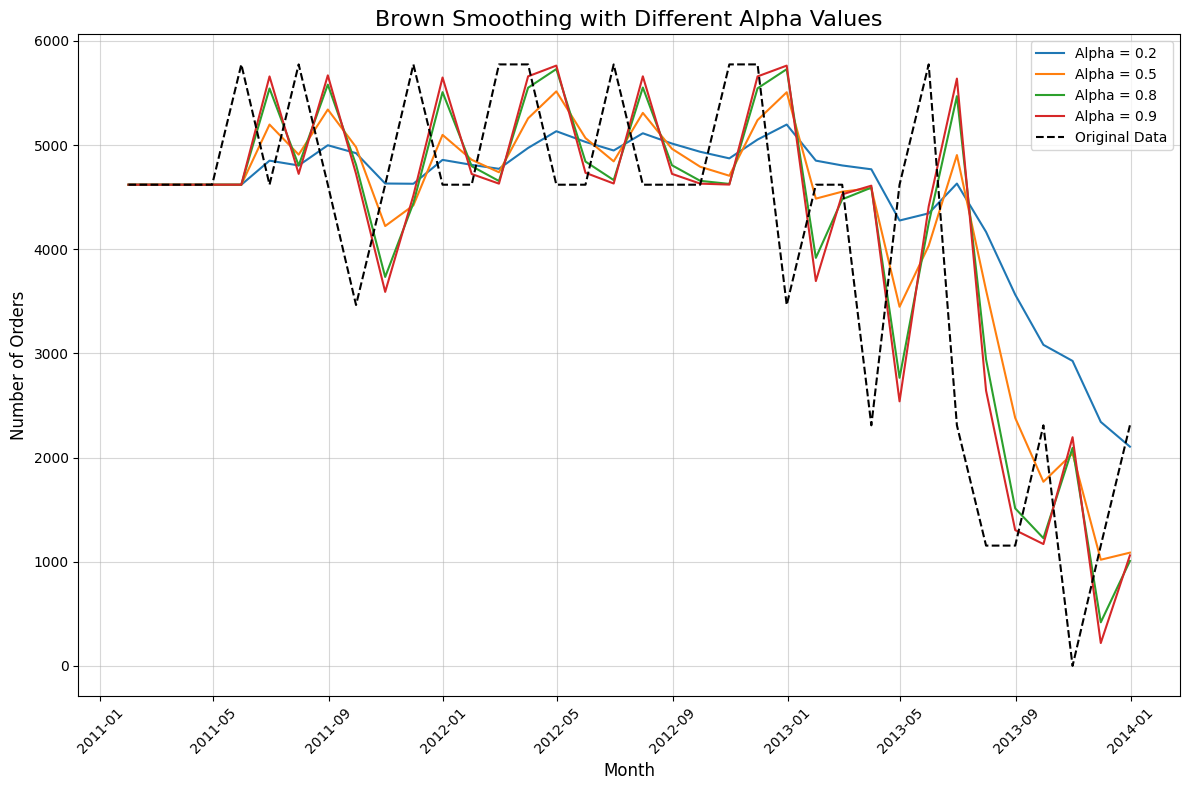

In [17]:


# Resample the data to aggregate orders by month
orders_by_month = df.resample('M', on='Date').size()

# Initialize the figure
plt.figure(figsize=(12, 8))

# Define alpha values for smoothing
alpha_values = [0.2, 0.5, 0.8, 0.9]

# Apply Brown smoothing with different alpha values and plot
for alpha in alpha_values:
    # Fit the model
    model = SimpleExpSmoothing(orders_by_month.values).fit(smoothing_level=alpha, optimized=False)
    smoothed = model.fittedvalues

    # Plot the smoothed data
    plt.plot(orders_by_month.index, smoothed, label=f'Alpha = {alpha}')

# Plot the original data
plt.plot(orders_by_month.index, orders_by_month.values, color='black', linestyle='--', label='Original Data')

# Add title, legend, and labels
plt.title('Brown Smoothing with Different Alpha Values', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11788\4283513973.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\User\AppData\Local\Temp\ipykernel_11788\4283513973.py:18: FutureWarning:

the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.

C:\Users\User\AppData\Local\Temp\ipykernel_11788\4283513973.py:18: FutureWarning:

the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.

C:\Users\User\AppData\Local\Temp\ipykernel_11788\4283513973.py:18: FutureWarning:

the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.

C:\Users\User\AppData\Local\Temp\ipykernel_11788\4283513973.py:18: FutureWarning:

the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.



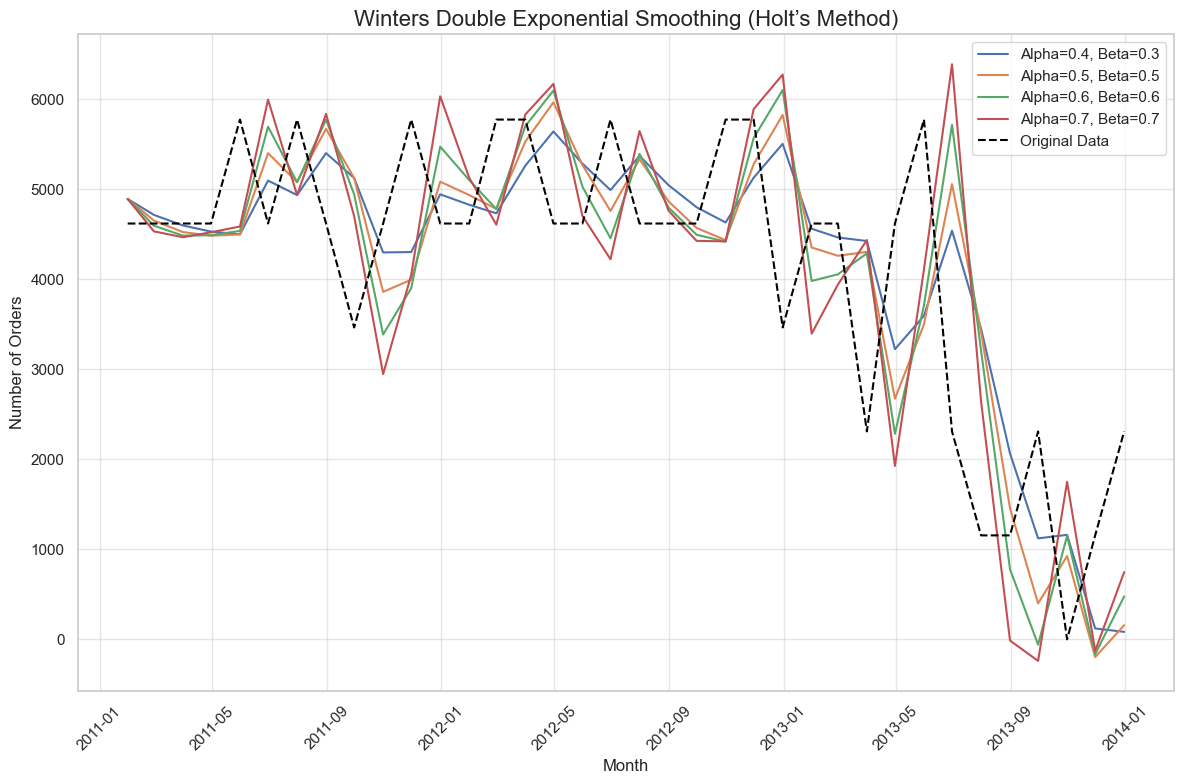

In [36]:


# Resample the data to aggregate orders by month
orders_by_month = df.resample('M', on='Date').size()

# Initialize the figure
plt.figure(figsize=(12, 8))

# Define alpha and beta values (closer to improve alignment)
alpha_values = [0.4, 0.5, 0.6, 0.7]
beta_values = [0.3, 0.5, 0.6, 0.7]

# Loop through combinations of alpha and beta
for alpha, beta in zip(alpha_values, beta_values):
    # Fit the Double Exponential Smoothing model (Holt’s method)
    model = ExponentialSmoothing(
        orders_by_month.values, trend="additive", seasonal=None
    ).fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
    smoothed = model.fittedvalues

    # Plot the smoothed data
    plt.plot(orders_by_month.index, smoothed, label=f'Alpha={alpha}, Beta={beta}')

# Plot the original data
plt.plot(orders_by_month.index, orders_by_month.values, color='black', linestyle='--', label='Original Data')

# Add title, legend, and labels
plt.title('Winters Double Exponential Smoothing (Holt’s Method)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11788\2535047738.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\User\AppData\Local\Temp\ipykernel_11788\2535047738.py:12: FutureWarning:

the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.

C:\Users\User\AppData\Local\Temp\ipykernel_11788\2535047738.py:26: FutureWarning:

the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.



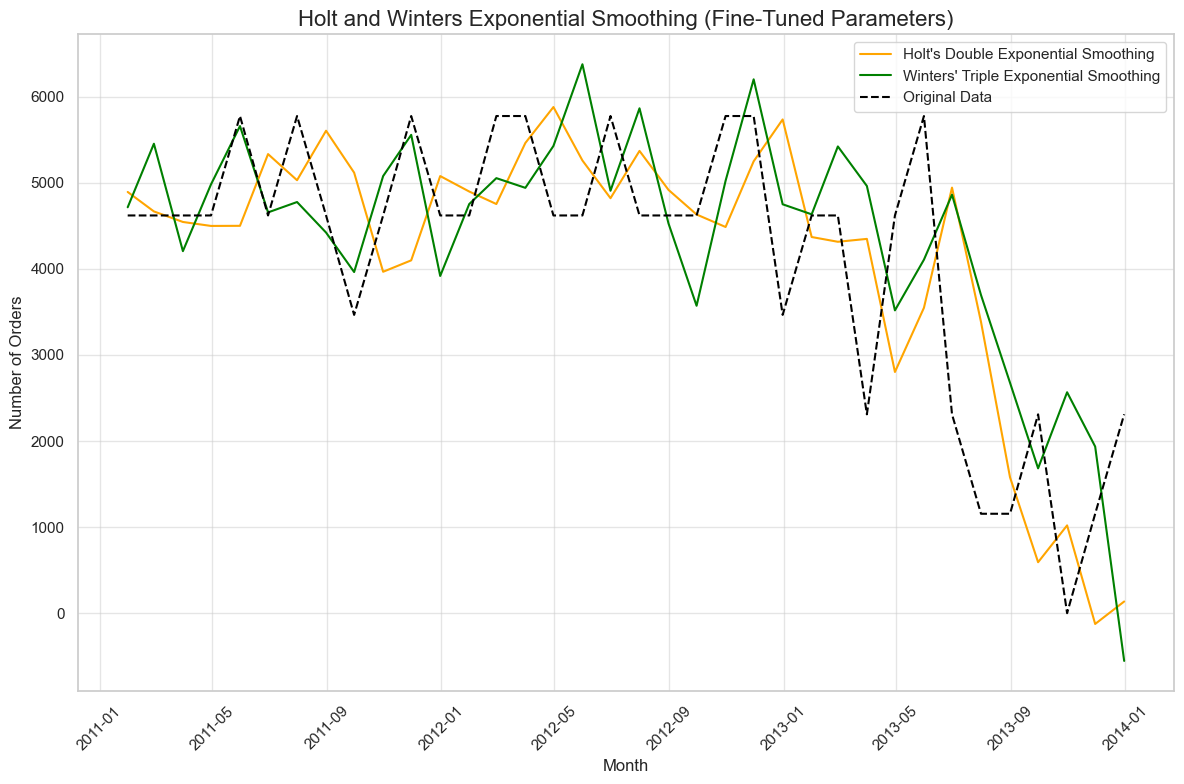

In [44]:


# Resample the data to aggregate orders by month
orders_by_month = df.resample('M', on='Date').size()

# Initialize the figure
plt.figure(figsize=(12, 8))

# Holt's Double Exponential Smoothing (Additive Trend, No Seasonality)
holt_model = ExponentialSmoothing(
    orders_by_month.values, trend="additive", seasonal=None
).fit(smoothing_level=0.5, smoothing_slope=0.4, optimized=False)
holt_smoothed = holt_model.fittedvalues

# Plot Holt's model
plt.plot(
    orders_by_month.index,
    holt_smoothed,
    label="Holt's Double Exponential Smoothing",
    color="orange",
)

# Winters' Triple Exponential Smoothing (Additive Trend and Seasonality)
winters_model = ExponentialSmoothing(
    orders_by_month.values, trend="additive", seasonal="additive", seasonal_periods=12
).fit(smoothing_level=0.2, smoothing_slope=0.2, smoothing_seasonal=0.6, optimized=False)
winters_smoothed = winters_model.fittedvalues

# Plot Winters' model
plt.plot(
    orders_by_month.index,
    winters_smoothed,
    label="Winters' Triple Exponential Smoothing",
    color="green",
)


# Plot the original data
plt.plot(
    orders_by_month.index,
    orders_by_month.values,
    label="Original Data",
    
    color="black",
    linestyle="--",
)

# Add title, legend, and labels
plt.title("Holt and Winters Exponential Smoothing (Fine-Tuned Parameters)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Importance of Tuning Alpha, Beta, and Gamma

The choice of **alpha (level), beta (trend), and gamma (seasonality)** significantly impacts smoothing accuracy. From the plots:

### Key Observations:
1. **Brown Smoothing**:
   - Low alpha values (e.g., 0.2 in the third plot) overly smooth the data, missing fluctuations.
   - High alpha values (e.g., 0.9) react to noise, distorting trends.

2. **Holt’s Smoothing**:
   - Misaligned alpha and beta values in the second plot fail to capture the trend accurately, leading to poor smoothing.

3. **Winters’ Smoothing**:
   - Improper gamma values (e.g., third plot) lead to poor handling of seasonality, with either underfitting or overshooting patterns.

### Why It Matters:
Poor parameter choices can miss key patterns or amplify noise. A well-tuned model balances these parameters to:
- Accurately capture trends and seasonality.
- Provide reliable forecasts.

### Conclusion:
The plots demonstrate the need for automated tuning methods (e.g., optimization or predictive models) to ensure accurate smoothing and analysis.


# model training 

### first we need to   generate a training dataset , and it need to be from our dataset .

### Generating Training Data for Predicting Alpha

#### **Approach Summary**
1. **Sampling Time-Series Subsets**:
   - Small random windows (e.g., 12 months) are extracted from the time series.

2. **Testing Alpha Values**:
   - Different alpha values are applied to each subset using smoothing techniques.
   - The best alpha is chosen based on the lowest error between actual and smoothed data.

3. **Extracting Features**:
   - Key properties of the subset are calculated, such as:
     - **Average Value** (Mean)
     - **Variability** (Standard Deviation)
     - **Trend Strength** (Start vs. End Difference)
     - **Seasonality** (Max vs. Min Difference)
     - **Autocorrelation** (Lag Relationship)

4. **Labeling Data**:
   - The best alpha becomes the target value for each subset.

---

#### **Why Use This Approach?**
- Automatically finds the best alpha for smoothing.
- Prepares a dataset to train a model that predicts alpha for new data.
- Makes it easier to handle noisy or seasonal data.

---

#### **Key Benefits**:
- Handles different patterns (e.g., trend, seasonality).
- Eliminates manual tuning of alpha values.
- Helps train a model that generalizes to new time series.



In [9]:
df=pd.read_csv(r"C:\Users\User\final_dataset.csv")

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')



In [10]:
df = pd.read_csv(r"C:\Users\User\final_dataset.csv", parse_dates=["Date"])
print(df.head())  # This should display the Date column


   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id       Date  
0        86             16 2011-01-17  
1        83              4 2011-01-17  
2       104             13 2011-01-17  
3        19             13 2011-01-17  
4        17             13 2011-01-17  


C:\Users\User\AppData\Local\Temp\ipykernel_9292\2548025016.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\User\final_dataset.csv", parse_dates=["Date"])


In [11]:

def generate_training_data(series, alphas, subset_length=12, num_samples=50):
    data = []
    for _ in range(num_samples):
        # Randomly sample a subset
        start = np.random.randint(0, len(series) - subset_length)
        subset = series[start:start + subset_length]
        
        # Find the best alpha
        best_alpha = None
        lowest_error = float("inf")
        for alpha in alphas:
            model = SimpleExpSmoothing(subset).fit(smoothing_level=alpha, optimized=False)
            smoothed = model.fittedvalues
            error = mean_squared_error(subset, smoothed)
            if error < lowest_error:
                best_alpha = alpha
                lowest_error = error
        
    
        features = {
            "mean": np.mean(subset),
            "std_dev": np.std(subset),
            "trend_strength": subset[-1] - subset[0],
            "autocorrelation": pd.Series(subset).autocorr(lag=1),
            "seasonal_strength": np.max(subset) - np.min(subset),
            "best_alpha": best_alpha
        }
        data.append(features)
    
    return pd.DataFrame(data)

# Resample the data by day
orders_by_day = df.resample('D', on='Date').size()

# Check number of rows after resampling
print(f"Number of rows after resampling: {len(orders_by_day)}")

# Ensure the dataset is large enough
if len(orders_by_day) < 12:
    raise ValueError("The dataset does not have enough data for 12-day subsets.")

# Generate training data
alphas = np.linspace(0.1, 1.0, 10)  # Range of alpha values
training_data = generate_training_data(orders_by_day.values, alphas, subset_length=12)

# Display sample training data
print("Sample Training Data:")
print(training_data.head())


Number of rows after resampling: 1061


C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1412: RuntimeWarning: divide by zero encountered in

Sample Training Data:
     mean     std_dev  trend_strength  autocorrelation  seasonal_strength  \
0  192.50  430.443086               0        -0.222222               1155   
1   96.25  319.225136               0        -0.100000               1155   
2   96.25  319.225136               0        -0.100000               1155   
3    0.00    0.000000               0              NaN                  0   
4  192.50  430.443086               0        -0.222222               1155   

   best_alpha  
0         0.1  
1         0.1  
2         0.1  
3         0.1  
4         0.1  


C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
C:\Users\User\miniconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1412: RuntimeWarning: divide by zero encountered in

Training Gradient Boosting...
Training Random Forest...
Training LSTM...
Epoch 1/10, Loss: 3.1658
Epoch 2/10, Loss: 2.0966
Epoch 3/10, Loss: 2.0709
Epoch 4/10, Loss: 2.0775
Epoch 5/10, Loss: 2.0704
Epoch 6/10, Loss: 2.0884
Epoch 7/10, Loss: 2.0852
Epoch 8/10, Loss: 2.1348
Epoch 9/10, Loss: 2.0853
Epoch 10/10, Loss: 2.1231


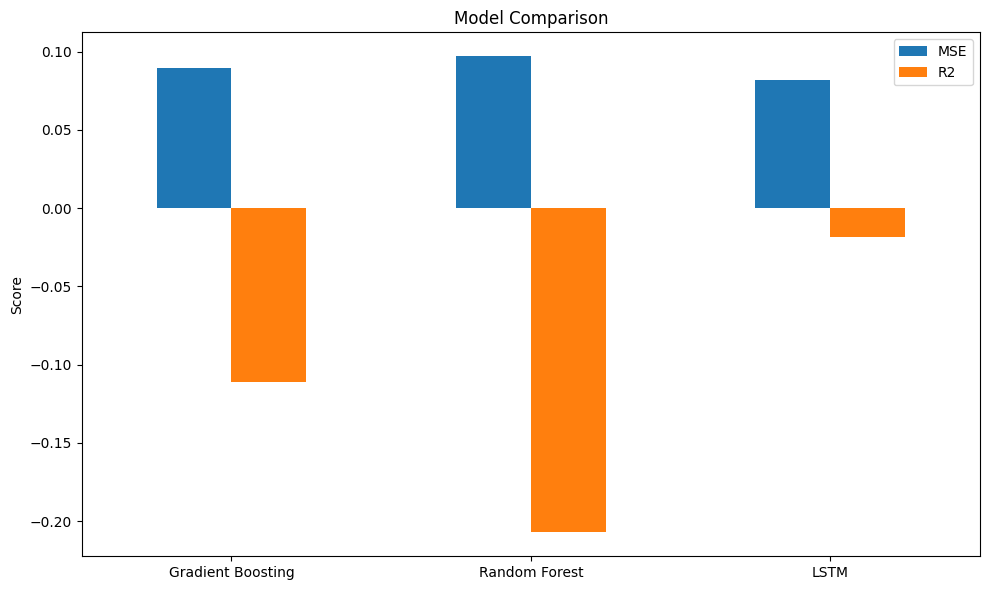

Model Results:
                        MSE        R2
Gradient Boosting  0.089328 -0.111207
Random Forest      0.097040 -0.207145
LSTM               0.081892 -0.018708


In [7]:

# Generate synthetic dataset (replace this with your actual dataset)
np.random.seed(42)
data = {
    "feature1": np.random.rand(1000),
    "feature2": np.random.rand(1000),
    "feature3": np.random.rand(1000),
    "best_alpha": np.random.rand(1000)
}
df = pd.DataFrame(data)

# Split data into features and target
X = df.drop(columns=["best_alpha"])
y = df["best_alpha"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "R2": r2}

# LSTM Model
class AlphaDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Prepare LSTM data
train_dataset = AlphaDataset(X_train, y_train)
test_dataset = AlphaDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# LSTM Training
input_size = X_train.shape[1]
hidden_size = 50
output_size = 1
num_epochs = 10
learning_rate = 0.01

lstm_model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)

# Train LSTM
print("Training LSTM...")
for epoch in range(num_epochs):
    lstm_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence dimension
        y_batch = y_batch.unsqueeze(1)  # Make y_batch 2D
        outputs = lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# Evaluate LSTM
lstm_model.eval()
lstm_preds = []
lstm_targets = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence dimension
        outputs = lstm_model(X_batch).squeeze(1)
        lstm_preds.extend(outputs.numpy())
        lstm_targets.extend(y_batch.numpy())

lstm_mse = mean_squared_error(lstm_targets, lstm_preds)
lstm_r2 = r2_score(lstm_targets, lstm_preds)
results["LSTM"] = {"MSE": lstm_mse, "R2": lstm_r2}

# Plot metrics
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Model Results:")
print(metrics_df)


#### Choice: The Gradient Boosting Regressor is the best model for predicting alpha due to its superior performance metrics.

In [14]:
models = {
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor()
}


In [15]:
# Access Gradient Boosting model results
gradient_boosting_results = results["Gradient Boosting"]

# Print Gradient Boosting results
print(f"Gradient Boosting Results:")
print(f"MSE: {gradient_boosting_results['MSE']}")
print(f"R2: {gradient_boosting_results['R2']}")


Gradient Boosting Results:
MSE: 0.08932777777099066
R2: -0.11120707391936491


In [17]:
# Convert X_train and X_test to DataFrames with consistent feature names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Train the model again
gradient_boosting_model.fit(X_train, y_train)

# Predict the top 10 values
predicted_alpha = gradient_boosting_model.predict(X_test)
print("Top 10 Predicted Alpha Values:")
print(predicted_alpha[:10])


Top 10 Predicted Alpha Values:
[0.54087131 0.57622731 0.4390643  0.53286337 0.35127691 0.33462414
 0.49195926 0.56900297 0.66825968 0.50137265]


C:\Users\User\AppData\Local\Temp\ipykernel_11788\2033496406.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



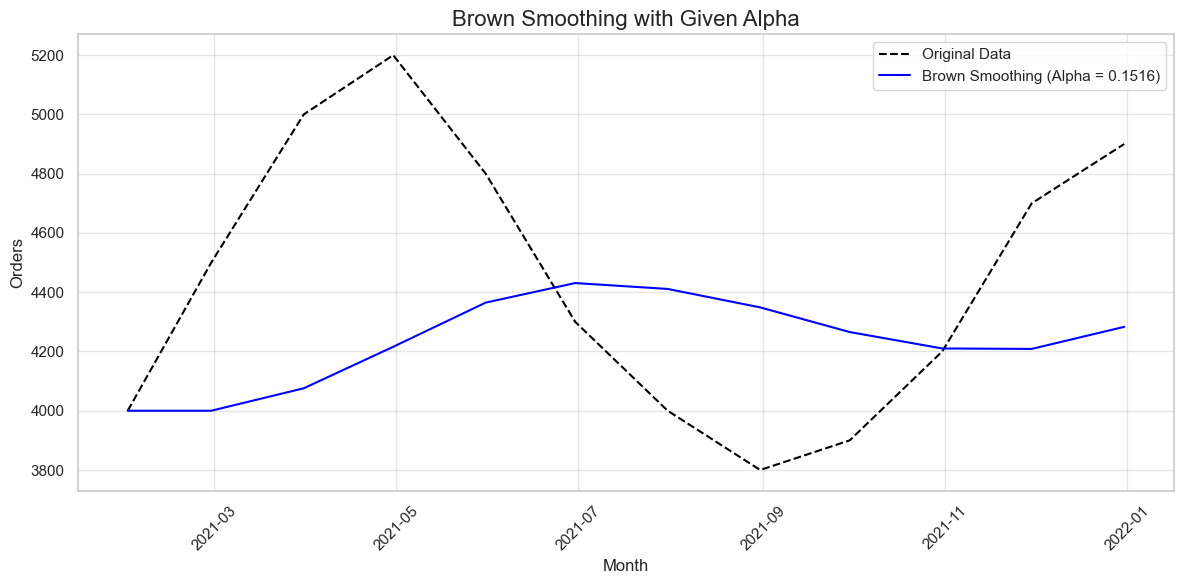

In [69]:

# Define the orders_by_month data
orders_by_month = pd.Series(
    [4000, 4500, 5000, 5200, 4800, 4300, 4000, 3800, 3900, 4200, 4700, 4900],
    index=pd.date_range(start="2021-01-01", periods=12, freq="M")
)

# Define the alpha value
alpha = 0.15155198

# Apply Brown Smoothing (Simple Exponential Smoothing)
model = SimpleExpSmoothing(orders_by_month).fit(smoothing_level=alpha, optimized=False)
smoothed_data = model.fittedvalues

# Plot the original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(orders_by_month, label="Original Data", linestyle="--", color="black")
plt.plot(smoothed_data, label=f"Brown Smoothing (Alpha = {alpha:.4f})", color="blue")
plt.title("Brown Smoothing with Given Alpha", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Orders", fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### it's obvious that we're not going to obtain, excelent results here , 
#### especially that out data needs a holt-winter smoothing but the good part that our script and model succeeded since Simple Exponential Smoothing, primarily corrects random noise in a time series by smoothing out short-term fluctuations
#### and that's exactly what we got here , so the next step is proceeding with holt-winter s smoothing model.
### Why Holt-Winters?
Holt-Winters smoothing is ideal because it accounts for **yearly patterns** and reduces noise, making trends and seasonality clearer.